# Route Maps by Parade

This notebook will attempt to make sensable route maps by parade

In [1]:
#imports and such
from datetime import datetime
import geopandas as gpd
import geoplot as gplt
import os
from matplotlib import pyplot as plt
import shapely
import pyproj
import pandas as pd
import warnings
import numpy as np

In [2]:
#very annoying warnings coming from pyproj
warnings.filterwarnings('ignore', category=FutureWarning, module='pyproj')

In [3]:
def lp(v):
    print(f"[{datetime.now()}] {v}")

lp("Starting...")

[2025-02-26 12:22:47.184692] Starting...


In [4]:
mapsPath = f"{os.curdir}{os.sep}RouteMaps{os.sep}"
lp(f"Maps Path:  {mapsPath}")

if not os.path.exists(mapsPath):
    lp(f"Creating  {mapsPath}")
    os.mkdir(mapsPath)

[2025-02-26 12:22:47.189333] Maps Path:  ./RouteMaps/


In [5]:
dataPath = f"{os.curdir}{os.sep}datasets{os.sep}"
lp(f"Data Path:  {dataPath}")

[2025-02-26 12:22:47.192948] Data Path:  ./datasets/


In [6]:
#all the parade routes
routesDf = gpd.read_file(f"{dataPath}paradeRoutes.geojson")
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])
routesDf.set_index('parade', inplace=True)
routesDf.head()

,location,numfloats,formation,disband,objectid,date,time,shape_stlength,day,geometry
parade,,,,,,,,,,
Chaos,Uptown,None,Napoleon and Magazine,Canal and Roosevelt Way,17,2025-02-27 18:30:00+00:00,6:30pm,18801.130441472782,2nd Thursday,"MULTILINESTRING ((-90.10137 29.92082, -90.1018..."
Cleopatra,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,4,2025-02-21 18:00:00+00:00,6:00pm,21161.075592614441,1st Friday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Krewe Du Vieux,Downtown,None,Marigny and Decatur,Andrew Higgins and S. Peters,34,2025-02-15 18:30:00+00:00,6:30pm,15476.953108061272,Walking Parade,"MULTILINESTRING ((-90.05506 29.96271, -90.0551..."
Tucks,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,22,2025-03-01 12:30:00+00:00,12:30pm,21095.835274003577,2nd Saturday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Bohème,Downtown,None,Decatur St. from Mandeville St to Music St.,Basin St and Canal St.,36,2025-02-14 19:00:00+00:00,7:00pm,12290.192829423802,Walking Parade,"MULTILINESTRING ((-90.05392 29.96277, -90.0550..."


In [7]:
#convert multilines to singlelines
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])

In [8]:
#all of our streets
streetsDf = gpd.read_file(f"{dataPath}streets.geojson")\
    .groupby(['fullnameabv','roadclass'])\
    .apply(lambda df: shapely.ops.unary_union( df['geometry'] ), include_groups=False )  #combine all the streets for labeling purposes

streetsDf = gpd.GeoDataFrame( streetsDf.to_frame().reset_index().rename(columns={0:'geometry'}), geometry='geometry' )

streetsDf.head()

,fullnameabv,roadclass,geometry
0,10th St,Local,"MULTILINESTRING ((-90.11623 29.99985, -90.1162..."
1,12th St,Local,"MULTILINESTRING ((-90.11922 30.00083, -90.1192..."
2,14th St,Local,"MULTILINESTRING ((-90.11892 30.00164, -90.1189..."
3,16th St,Local,"MULTILINESTRING ((-90.11885 30.00247, -90.1191..."
4,18th St,Local,"MULTILINESTRING ((-90.11598 30.00313, -90.1182..."


In [9]:
streetsDf.head()

,fullnameabv,roadclass,geometry
0,10th St,Local,"MULTILINESTRING ((-90.11623 29.99985, -90.1162..."
1,12th St,Local,"MULTILINESTRING ((-90.11922 30.00083, -90.1192..."
2,14th St,Local,"MULTILINESTRING ((-90.11892 30.00164, -90.1189..."
3,16th St,Local,"MULTILINESTRING ((-90.11885 30.00247, -90.1191..."
4,18th St,Local,"MULTILINESTRING ((-90.11598 30.00313, -90.1182..."


In [10]:
#this created plenty of warning but we are just loading it so we can see the mississppi and maybe some other water if it comes to that
riverDf = gpd.read_file(f"{dataPath}MississippiRiver.zip")
riverDf.head()

/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 3 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 4 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 5

,WATER2_ID,FEATURE,LENGTH,XXX,geometry
0,1,0,0.0,Region,"MULTIPOLYGON (((-90.54858 30.16849, -90.54896 ..."
1,2,0,0.0,Region,"MULTIPOLYGON (((-90.02944 29.96027, -90.02743 ..."
2,3,0,0.0,Region,"MULTIPOLYGON (((-90.3685 30.05726, -90.36874 3..."
3,4,0,0.0,None,"MULTIPOLYGON (((-89.4196 30.03959, -89.41818 3..."
4,5,0,0.0,None,"MULTIPOLYGON (((-89.37342 30.0375, -89.31526 3..."


In [11]:
greenDf = gpd.read_file(f"{dataPath}greenLocations.geojson")
greenDf.head()

,jurisdiction,name,greenspaceaddress,maintenance,objectid,nearest_address,ownership,notes,type,shape_stlength,shape_starea,geometry
0,None,None,None,None,9327,None,None,None,Undeveloped,300.33774061877318,5012.6244577545376,"MULTIPOLYGON (((-89.97714 29.90705, -89.97746 ..."
1,None,None,None,None,8566,None,None,None,Median,185.52086128115229,1633.7188616107201,"MULTIPOLYGON (((-89.97673 30.03758, -89.9767 3..."
2,None,None,None,None,10747,None,None,None,Undeveloped,310.22021494077171,3824.3885778867466,"MULTIPOLYGON (((-90.00107 29.98684, -90.0011 2..."
3,None,None,18 Eugenie Court,None,8943,18 Eugenie Court,None,None,Undeveloped,4287.5969191170643,475007.31243397295,"MULTIPOLYGON (((-90.01224 29.90158, -90.01224 ..."
4,None,None,None,None,6612,5609 Marais Street,None,None,Median,510.78093872962899,1877.5040726519417,"MULTIPOLYGON (((-90.01551 29.96204, -90.01551 ..."


In [12]:
sorted(routesDf.index)

['Alla',
 'Babylon',
 'Bacchus',
 'Barkus',
 'Bohème',
 'Carrollton',
 'Chaos',
 'Chewbacchus',
 'Choctaw',
 'Cleopatra',
 'Crescent City',
 "D'etat",
 'Druids',
 'Elks',
 'Endymion',
 'Femme Fatale',
 'Freret',
 'Hermes',
 'Iris',
 'King Arthur',
 'Krewe Du Vieux',
 'Mars',
 'Mid-City',
 'Morpheus',
 'Muses',
 'NOMTOC',
 'Okeanos',
 'Orpheus',
 'Oshun',
 'Pontchartrain',
 'Proteus',
 'Pygmalion',
 'Rex',
 'Sparta',
 'Thoth',
 'Tucks',
 'Zulu']

In [13]:
streetClasses = ['Local', 'Major Arterial', 'Freeway', 'Minor Arterial']

In [14]:
class MyRoute:

    
    
    def __init__(self, name):
        
        self.name = name
        self.setExtent( routesDf.loc[[self.name],'geometry'].total_bounds )
                
        self.epsg = '32615'
        self.epsgRoute = routesDf.loc[[self.name],'geometry'].to_crs(f"EPSG:{self.epsg}")

        self.UTMtoWGS = pyproj.Transformer.from_crs(self.epsgRoute.crs, routesDf.crs)

    def clipStreets(self):
        self.streetsDf = self.intersectStreets().copy()

        self.streetsDf['geometry'] = self.streetsDf.clip_by_rect(*self.extent)
        

    def transform2XY(self,lon,lat):
        lonTrans = self.extent[0] - self.extent[2]
        latTrans = self.extent[1] - self.extent[3]
    
        x = abs((lon - self.extent[0]) / lonTrans)
        y = abs((lat - self.extent[1]) / latTrans)
    
        return (x,y)

    
    def figSize(self, figWidth=10):

        lonLen = self.extent[2] - self.extent[0]
        latLen = self.extent[3] - self.extent[1]

        figHeight = figWidth * (latLen / lonLen)
        
        return (figWidth, figHeight)

    def setExtent(self, newExtent):
        self.extent = newExtent
        self.extentBox = shapely.geometry.box(*self.extent)
        

    def extentWithBuffer(self,setExtent = True, buffer = 0.001):

        newExtent = shapely.geometry.box(*self.extent).buffer(buffer).bounds

        if setExtent:
            self.setExtent(newExtent)
        
        return newExtent


    def xyOnRoute(self, distance):
        epsgPoint = self.epsgRoute.interpolate(distance,normalized=True)
        wgsPoint = self.UTMtoWGS.transform(epsgPoint.x, epsgPoint.y)
                
        return self.transform2XY(wgsPoint[1][0],wgsPoint[0][0])

    
    def inBounds(self, geoData):
        return geoData.intersects(self.extentBox)

    def intersectStreets(self):
        return streetsDf[streetsDf.intersects( routesDf.loc[self.name,'geometry'] ) & streetsDf['roadclass'].isin(streetClasses)].copy()

       
    def respPointsLabelsStreets(self):
        labelPoints = self.streetsDf['geometry'].map(lambda s: s.representative_point()).map(lambda p: self.transform2XY(p.x,p.y)).to_list()
        streetNames =  self.streetsDf['fullnameabv']

        return [(p[0],p[1],t) for p,t in zip(labelPoints, streetNames)]

    
    def getLabelRotations(self):

        bounds = self.streetsDf['geometry'].bounds

        rise = bounds['maxy'] - bounds['miny']

        run = bounds['maxx'] - bounds['minx']

        return np.atan2(rise , run) * 180.0 / np.pi
        
        

In [15]:
mr = MyRoute('Chewbacchus')
mr.clipStreets()

rotations = mr.getLabelRotations()
rotations.name = 'Rotations'
mr.streetsDf.join(rotations)




,fullnameabv,roadclass,geometry,Rotations
159,Barracks St,Local,"MULTILINESTRING ((-90.05775 29.96089, -90.0578...",35.810263
306,Burgundy St,Local,"MULTILINESTRING ((-90.05081 29.96677, -90.0507...",15.250240
405,Chartres St,Local,"MULTILINESTRING ((-90.05076 29.96366, -90.0507...",26.976550
486,Conti St,Local,"LINESTRING (-90.06469 29.95419, -90.06469 29.9...",34.399787
555,Dauphine St,Local,"MULTILINESTRING ((-90.0553 29.96566, -90.05438...",17.559525
569,Decatur St,Local,"MULTILINESTRING ((-90.052 29.9629, -90.05122 2...",29.758529
731,Elysian Fields Ave,Major Arterial,"MULTILINESTRING ((-90.05699 29.9687, -90.057 2...",83.343567
753,Esplanade Ave,Major Arterial,"MULTILINESTRING ((-90.05763 29.9619, -90.05773...",35.194645
860,Franklin Ave,Major Arterial,"MULTILINESTRING ((-90.05015 29.96892, -90.0501...",72.941690
866,Frenchmen St,Local,"MULTILINESTRING ((-90.05776 29.96353, -90.0578...",85.538686


[2025-02-26 12:22:50.714236] Creating Map for Chewbacchus		Fig Size: (10, 10.123919379498265)	Extent:  (-90.065688549738, 29.953192035750998, -90.04914601742199, 29.969939562101)	CRS:  <geoplot.crs.Mercator object at 0x7fed2c263f50>
[2025-02-26 12:22:50.831867] Finished Chewbacchus in 0:00:00.141284


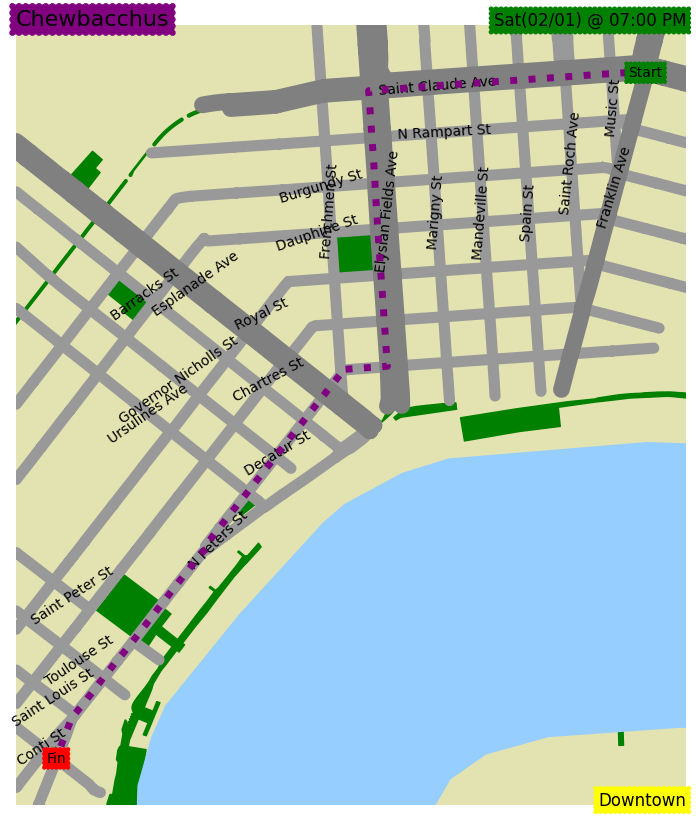

In [16]:


def plotParade(name="Chewbacchus", figWidth = 10, savePlot=False):

    startTime = datetime.now()

    crs = gplt.crs.Mercator()

    myRoute = MyRoute(name)

    extent = myRoute.extentWithBuffer()

    myRoute.clipStreets()
    
    figSize =  myRoute.figSize(figWidth)

    lp(f"Creating Map for {name}\t\tFig Size: {figSize}\tExtent:  {extent}\tCRS:  {crs}")

    
    fig, ax = plt.subplots(figsize=figSize, subplot_kw={'projection': crs})

    
    streetNameMask = myRoute.streetsDf.intersects(routesDf.loc[name,'geometry'])

    usefulStreetsList = myRoute.streetsDf[streetNameMask]['fullnameabv'].unique()

    streetMask = myRoute.streetsDf['fullnameabv'].isin(usefulStreetsList)

    streetTypeMask = {}
    for st in streetClasses:
        streetTypeMask[st] = streetMask & ( myRoute.streetsDf['roadclass'] == st )


    ax.set_facecolor((0.89, 0.886, 0.694))

    #Green Spaces
    gplt.polyplot(greenDf[myRoute.inBounds(greenDf)], ax=ax, extent=extent, color='green', zorder=-3)

    #River and Lakes
    gplt.polyplot(riverDf[myRoute.inBounds(riverDf)], ax=ax, extent=extent, color=(0.588,0.808,1.0), zorder=-2)

    #plot street types
    gplt.polyplot(myRoute.streetsDf[streetTypeMask['Freeway']], ax=ax, extent=extent, color=(0.4,0.4,0.4), linewidth=15, zorder=-1, capstyle='round')
    gplt.polyplot(myRoute.streetsDf[streetTypeMask['Local']], ax=ax, extent=extent, color=(0.6,0.6,0.6), linewidth=8, zorder=3, capstyle='round')
    gplt.polyplot(myRoute.streetsDf[streetTypeMask['Minor Arterial']], ax=ax, extent=extent, color=(0.55,0.55,0.55), linewidth=10, zorder=4, capstyle='round')
    gplt.polyplot(myRoute.streetsDf[streetTypeMask['Major Arterial']], ax=ax, extent=extent, color=(0.5,0.5,0.5), linewidth=12, zorder=5, capstyle='round')

    #Street Labels
    for label, rotation in zip(myRoute.respPointsLabelsStreets(), myRoute.getLabelRotations()):
        txtObj = ax.text(*label,transform=ax.transAxes,zorder=6,horizontalalignment='center', verticalalignment='center')
        txtObj.set_rotation(rotation)
        
    
    #parade name
    ax.text(0,1,name,transform=ax.transAxes,zorder=11,\
            fontsize=16,\
            bbox={'boxstyle':'roundtooth',
                'color':'purple'
               })

    #time
    paradeTimeStr = routesDf.loc[name,'date'].strftime('%a(%m/%d) @ %I:%M %p')
    ax.text(1,1,paradeTimeStr,transform=ax.transAxes,zorder=11,\
            fontsize=12,\
            horizontalalignment='right',\
            bbox={'boxstyle':'roundtooth',
                'color':'green'
               })

    #location
    paradeLoc = routesDf.loc[name,'location']
    ax.text(1,0,paradeLoc,transform=ax.transAxes,zorder=11,\
            fontsize=12,\
            horizontalalignment='right',\
            bbox={'boxstyle':'roundtooth',
                'color':'yellow'
               })
    
    #start
    ax.text(*myRoute.xyOnRoute(0), 'Start', transform=ax.transAxes,zorder=11,\
           c='black',\
           horizontalalignment='center',\
           verticalalignment='center',\
           bbox={'boxstyle':'roundtooth',
                    'color':'green'})

    #finish
    ax.text(*myRoute.xyOnRoute(1), 'Fin', transform=ax.transAxes,zorder=11,\
           c='black',\
           horizontalalignment='center',\
           verticalalignment='center',\
           bbox={'boxstyle':'roundtooth',
                 'color':'red'
                })

    #route
    gplt.polyplot(routesDf.loc[[name],'geometry'], ax=ax, extent=extent, edgecolor='purple',linewidth=5, zorder=10, linestyle='dotted')

    
    if savePlot:
        fig.savefig(f"{mapsPath}{name}.svg")
        plt.close()

    lp(f"Finished {name} in {datetime.now()-startTime}")

plotParade()

In [ ]:
startTime = datetime.now()
lp("Creating all maps and saving...")
for p in sorted(routesDf.index):

    lp(f"calling:  plotParade({p}, savePlot=True)")
    plotParade(p, savePlot=True)

lp(f"Total time {datetime.now() - startTime}")

[2025-02-26 12:22:51.697026] Creating all maps and saving...
[2025-02-26 12:22:51.697177] calling:  plotParade(Alla, savePlot=True)
[2025-02-26 12:22:51.745445] Creating Map for Alla		Fig Size: (10, 6.849103004903176)	Extent:  (-90.11598188915501, 29.919291714901, -90.06515484430099, 29.954103681465)	CRS:  <geoplot.crs.Mercator object at 0x7fed2c236290>
[2025-02-26 12:22:55.041358] Finished Alla in 0:00:03.344156
[2025-02-26 12:22:55.041503] calling:  plotParade(Babylon, savePlot=True)
[2025-02-26 12:22:55.073142] Creating Map for Babylon		Fig Size: (10, 9.310473147192152)	Extent:  (-90.102936988066, 29.919819795492, -90.06611406249499, 29.954103681465)	CRS:  <geoplot.crs.Mercator object at 0x7fed7c079dd0>
[2025-02-26 12:22:56.530760] Finished Babylon in 0:00:01.489224
[2025-02-26 12:22:56.531001] calling:  plotParade(Bacchus, savePlot=True)
[2025-02-26 12:22:56.598781] Creating Map for Bacchus		Fig Size: (10, 9.016019948240151)	Extent:  (-90.102936988066, 29.916155278351, -90.06084701

In [ ]:
lp("FIN")